In [1]:
import os; import pandas as pd; import numpy  as np
from pandas.tseries.offsets import *
import statsmodels.formula.api as smf

%pylab inline
%config InlineBackend.figure_format = 'retina'

Populating the interactive namespace from numpy and matplotlib


In [2]:
path = "C:/Users/Alex/Desktop/usi_hackathon_data_final/usi_hackathon_data/data/tpl/lines_events/"

## Line 1 - analysis

In [23]:
dfs = []

# Download the data for each bus line
for line in np.arange(1, 12):
    for month in np.arange(1, 10):
        df = pd.read_csv(path + "40" + "{2}".format(line) +"_2019_0" + "{1}".format(month) + ".csv")
        dfs.append(df)
    df = pd.concat(dfs)

IndexError: tuple index out of range

In [ ]:
### EACH LINE

#dfs = []

# Download the data for each bus line
#for line in np.arange(1, 12):
#    for month in np.arange(1, 10):
#        df = pd.read_csv(path + "40" + "{2}".format(line) +"_2019_0" + "{1}".format(month) + ".csv")
#        dfs.append(df)
#    df = pd.concat(dfs)

In [11]:
df.head()

,VEICOLO,TURNO,LINEA,CORSA,POSIZIONE,INDIRIZZO,DATA,TRANS.REALE,TRANS.PROGRAMMATO,SCOST.,KM,TRATTA REALE [KM],TRATTA PROGR. [KM],EVENTO,DURATA
0,309,40103,1,81140101302,414601,Pazzallo- P&R Fornaci- Mast 1,01.01.2019,00:01:26,23:55:00,-6.0,564383.08,0.00,0.000,NaN,NaN
1,325,40102,1,72740101161,414601,Pazzallo- P&R Fornaci- Mast 1,01.01.2019,14:45:46,14:42:00,-4.0,2700.42,0.00,0.000,M. Porte aperte,14.0
2,325,40102,1,72740101161,400201,Paradiso- Carzo- Mast 1,01.01.2019,14:47:22,14:43:30,-4.0,2701.35,0.83,0.940,NaN,NaN
3,325,40102,1,72740101161,411502,Paradiso- Brentino- Mast 2,01.01.2019,14:48:16,14:44:00,-4.0,2701.57,0.32,0.327,NaN,NaN
4,325,40102,1,72740101161,407702,Paradiso- Geretta- Mast 2,01.01.2019,14:49:12,14:45:00,-4.0,2701.83,0.26,0.181,M. Porte aperte,16.0


In [12]:
# the averaga for day
df.groupby(['DATA']).mean()

,TURNO,LINEA,CORSA,POSIZIONE,SCOST.,KM,TRATTA REALE [KM],TRATTA PROGR. [KM],DURATA
DATA,,,,,,,,,
01.01.2019,40101.493857,1.0,6.791750e+10,405037.388206,-2.449239,283701.772563,0.328645,0.351022,24.423729
01.02.2019,40102.485799,1.0,8.114010e+10,402189.556213,-1.664207,477361.577171,0.326637,0.339935,59.461538
01.03.2019,40102.578258,1.0,8.114010e+10,401538.762094,-0.983305,258135.409396,0.325525,0.342578,52.073801
01.04.2019,40102.588404,1.0,8.114010e+10,402138.605052,-1.043228,297058.707631,0.329862,0.333948,43.092896
01.05.2019,40101.210317,1.0,7.054407e+10,405456.299603,-4.243539,95818.444254,0.337845,0.342023,46.477396
...,...,...,...,...,...,...,...,...,...
31.01.2019,40102.582192,1.0,8.114010e+10,402122.696347,-1.332757,253489.997791,0.326669,0.333828,26.758003
31.03.2019,40101.204457,1.0,7.036190e+10,405123.551357,-2.505345,590291.444480,0.357335,0.346340,34.329365
31.05.2019,40102.594930,1.0,8.113650e+10,401910.042817,-1.511905,385669.906976,0.315793,0.337330,42.518173


In [17]:
df["DATA"] = pd.to_datetime(df["DATA"])
df["month"] = df["DATA"].dt.to_period('M').dt.to_timestamp('M')
df.groupby(['month']).mean()

,TURNO,LINEA,CORSA,POSIZIONE,SCOST.,KM,TRATTA REALE [KM],TRATTA PROGR. [KM],DURATA
month,,,,,,,,,
2019-01-31,40102.252938,1.0,7.778009e+10,402931.947871,-1.402374,276200.579195,0.323200,0.338364,43.404222
2019-02-28,40102.312669,1.0,7.798270e+10,402810.707389,-1.651619,343307.909206,0.339363,0.337815,44.772806
2019-03-31,40102.234991,1.0,7.742623e+10,403063.224847,-2.271034,364031.164362,0.364510,0.337530,40.187720
2019-04-30,40102.233539,1.0,7.752414e+10,403087.286402,-1.783398,378702.099718,0.360043,0.335550,44.617564
2019-05-31,40102.341057,1.0,7.858276e+10,402771.517087,-1.704733,338328.486217,0.341704,0.336102,39.623211
2019-06-30,40102.171394,1.0,7.711795e+10,403274.613810,-2.085182,374120.318564,0.339518,0.334327,45.262456
2019-07-31,40102.216796,1.0,7.755011e+10,403174.132273,-1.934391,319479.080707,0.351261,0.333056,38.180064
2019-08-31,40102.263016,1.0,7.787358e+10,403109.418793,-1.672269,395611.544492,0.357451,0.333525,46.771853
2019-09-30,40102.272109,1.0,7.745883e+10,402974.519024,-1.993623,344601.072844,0.337049,0.337076,44.750558


LINEA
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: SCOST., dtype: object

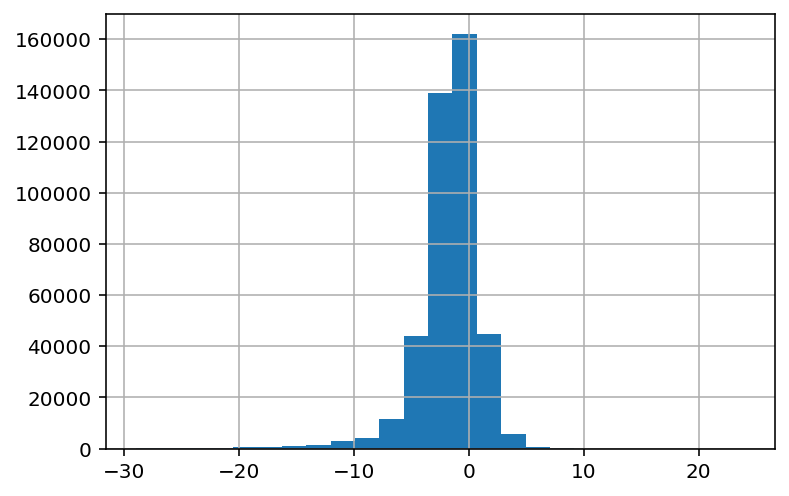

In [21]:
df[df['SCOST.'].abs()<30].groupby('LINEA')['SCOST.'].hist(bins=25)